In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# **Relative Strength Index (RSI)**

+ Vùng Quá Mua (RSI > 70): Quan sát trên biểu đồ, mỗi khi đường RSI màu cam vươn lên trên ngưỡng 70 (đường đỏ đứt quãng), giá VN-Index thường có xu hướng chững lại hoặc bắt đầu điều chỉnh giảm ngay sau đó. Điều này cho thấy thị trường đang ở mức "nóng" và có thể sắp bước vào giai đoạn hạ nhiệt.
+ Vùng Quá Bán (RSI < 30): Ngược lại, khi RSI giảm xuống dưới ngưỡng 30 (đường xanh đứt quãng), giá VN-Index thường có xu hướng ngừng giảm và bắt đầu có dấu hiệu phục hồi hoặc đảo chiều tăng trở lại. Điều này báo hiệu áp lực bán đã quá lớn và có thể sắp cạn kiệt.

=> RSI có hiệu quả trong việc xác định các vùng có khả năng đảo chiều của giá.

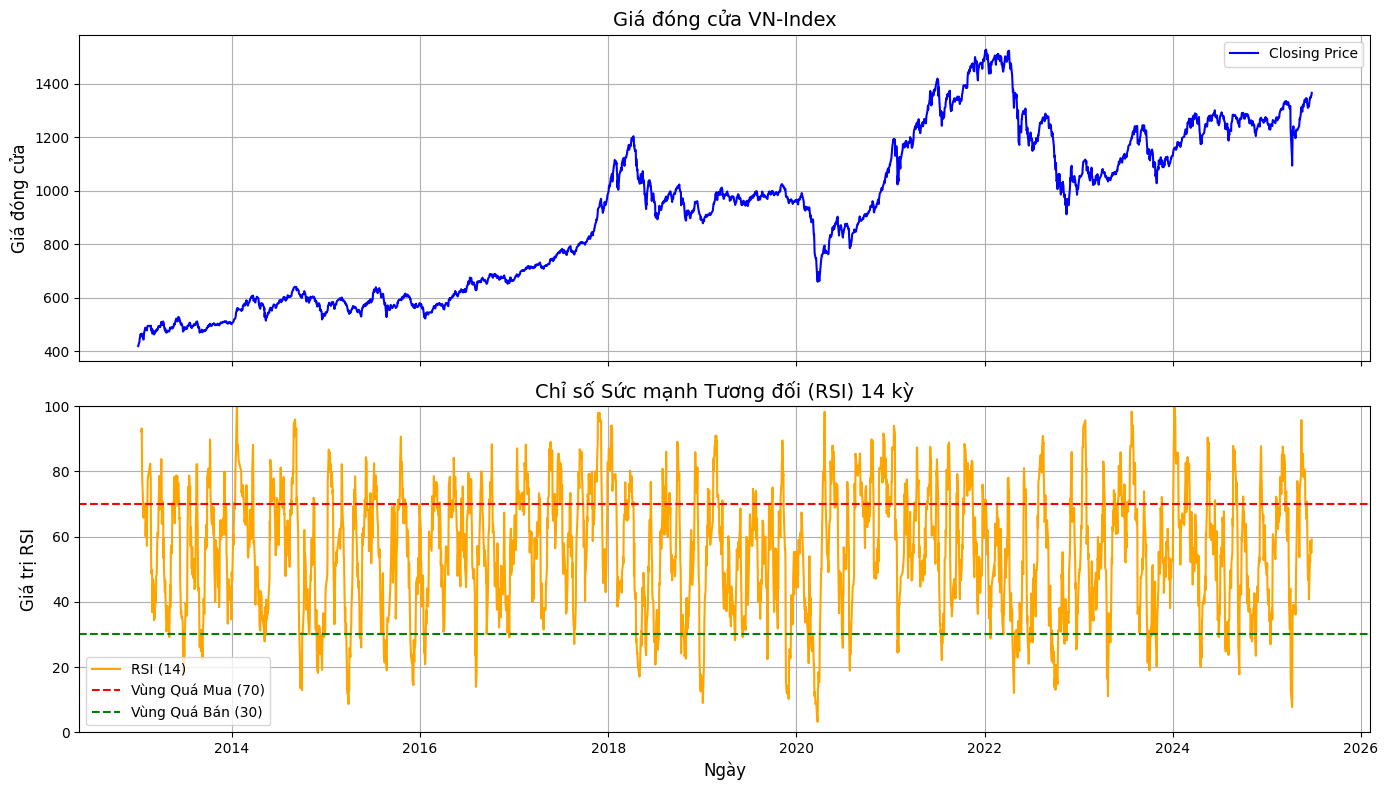

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('data104.csv')

# Convert the 'time' column to datetime objects
df['time'] = pd.to_datetime(df['time'])

# Sort data by time to ensure correct calculations
df = df.sort_values(by='time')

# --- Bắt đầu phần tính toán RSI (đã sửa lỗi NAType) ---
# Tính toán sự thay đổi giá (gain/loss)
delta = df['Close'].diff()

# Chia thành gain (tăng giá) và loss (giảm giá)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

# Tính trung bình gain và loss trong 14 kỳ (chu kỳ RSI phổ biến)
window = 14
avg_gain = gain.rolling(window=window, min_periods=1).mean()
avg_loss = loss.rolling(window=window, min_periods=1).mean()

# Tính toán Relative Strength (RS)
# Thay thế vô cực bằng np.nan thay vì pd.NA để tránh lỗi 'NAType'
rs = avg_gain / avg_loss
rs = rs.replace([np.inf, -np.inf], np.nan) # SỬA LỖI Ở ĐÂY: Dùng np.nan

# Tính toán RSI
df['RSI'] = 100 - (100 / (1 + rs))

# --- Kết thúc phần tính toán RSI ---

# Vẽ 2 biểu đồ: giá đóng cửa & RSI
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# 1. Giá đóng cửa
ax1.plot(df['time'], df['Close'], label='Closing Price', color='blue')
ax1.set_title('Giá đóng cửa VN-Index', fontsize=14)
ax1.set_ylabel('Giá đóng cửa', fontsize=12)
ax1.grid(True)
ax1.legend()

# 2. RSI
ax2.plot(df['time'], df['RSI'], label='RSI (14)', color='orange')
ax2.axhline(70, color='red', linestyle='--', label='Vùng Quá Mua (70)')
ax2.axhline(30, color='green', linestyle='--', label='Vùng Quá Bán (30)')
ax2.set_title('Chỉ số Sức mạnh Tương đối (RSI) 14 kỳ', fontsize=14)
ax2.set_ylabel('Giá trị RSI', fontsize=12)
ax2.set_xlabel('Ngày', fontsize=12)
ax2.set_ylim(0, 100) # Đặt giới hạn trục y cho RSI từ 0 đến 100
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.savefig('vnindex_close_rsi_plot.png')

Đánh dấu các tín hiệu Quá mua/Quá bán trên biểu đồ

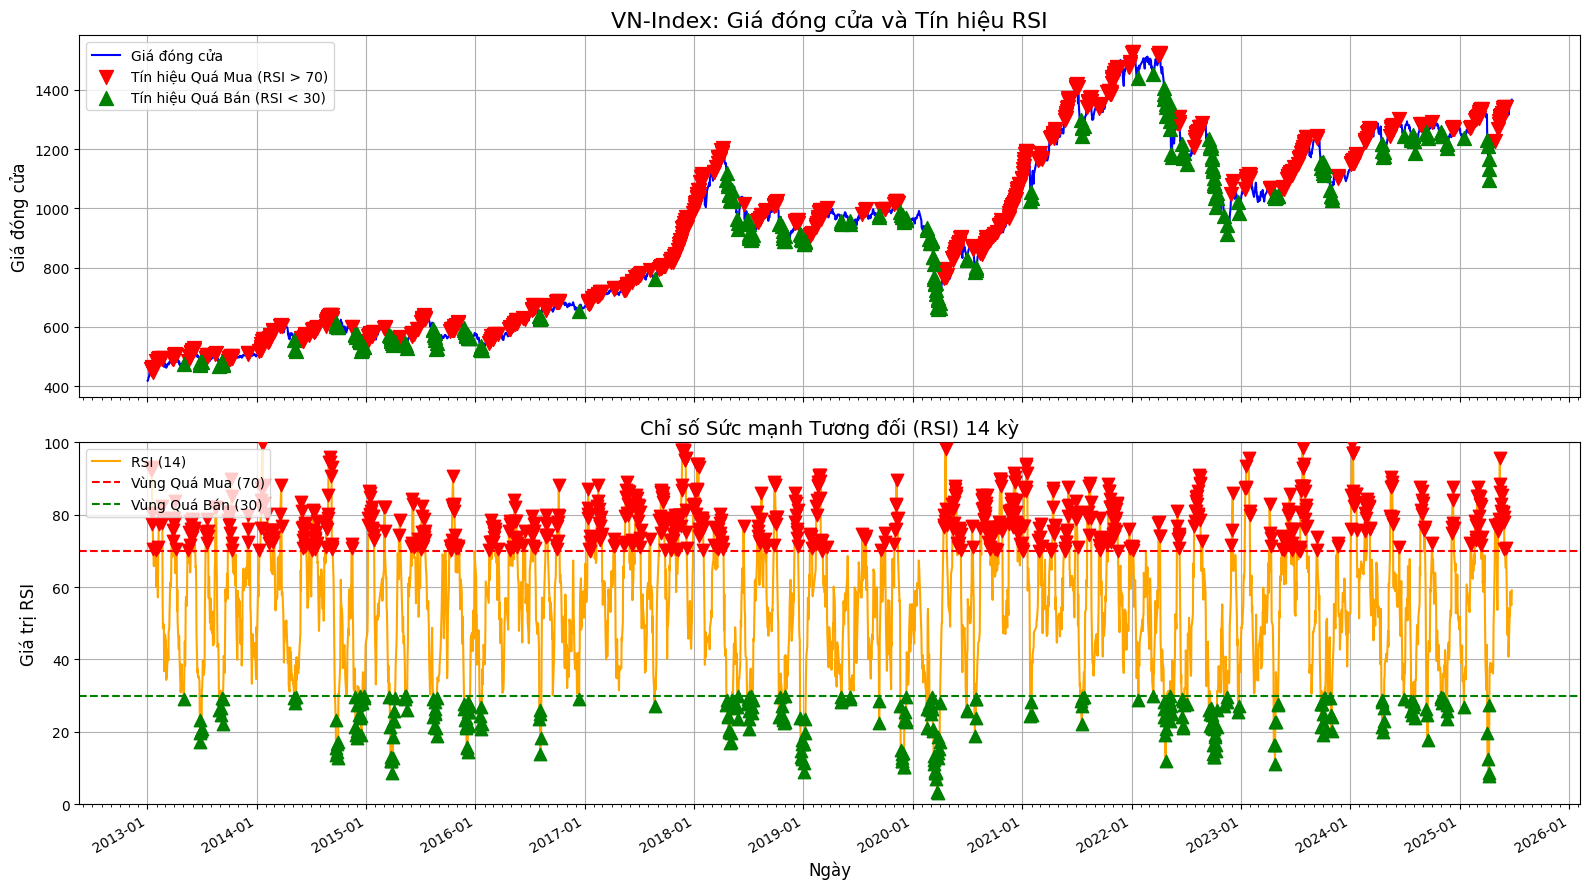

In [3]:
df['RSI_Overbought'] = np.where(df['RSI'] > 70, df['Close'], np.nan)
df['RSI_Oversold'] = np.where(df['RSI'] < 30, df['Close'], np.nan)

# --- Phần vẽ biểu đồ và đánh dấu ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9), sharex=True)

# 1. Biểu đồ Giá đóng cửa
ax1.plot(df['time'], df['Close'], label='Giá đóng cửa', color='blue', linewidth=1.5)
# Dòng code đánh dấu Quá Mua trên biểu đồ giá
ax1.scatter(df['time'], df['RSI_Overbought'], marker='v', color='red', s=100, label='Tín hiệu Quá Mua (RSI > 70)', zorder=5)
# Dòng code đánh dấu Quá Bán trên biểu đồ giá
ax1.scatter(df['time'], df['RSI_Oversold'], marker='^', color='green', s=100, label='Tín hiệu Quá Bán (RSI < 30)', zorder=5)

ax1.set_title('VN-Index: Giá đóng cửa và Tín hiệu RSI', fontsize=16)
ax1.set_ylabel('Giá đóng cửa', fontsize=12)
ax1.grid(True)
ax1.legend(loc='upper left', fontsize=10)

# 2. Biểu đồ RSI
ax2.plot(df['time'], df['RSI'], label='RSI (14)', color='orange', linewidth=1.5)
ax2.axhline(70, color='red', linestyle='--', label='Vùng Quá Mua (70)')
ax2.axhline(30, color='green', linestyle='--', label='Vùng Quá Bán (30)')
# Dòng code đánh dấu trực tiếp trên biểu đồ RSI cho Quá Mua
ax2.scatter(df['time'], np.where(df['RSI'] > 70, df['RSI'], np.nan), marker='v', color='red', s=80, zorder=5)
# Dòng code đánh dấu trực tiếp trên biểu đồ RSI cho Quá Bán
ax2.scatter(df['time'], np.where(df['RSI'] < 30, df['RSI'], np.nan), marker='^', color='green', s=80, zorder=5)

ax2.set_title('Chỉ số Sức mạnh Tương đối (RSI) 14 kỳ', fontsize=14)
ax2.set_ylabel('Giá trị RSI', fontsize=12)
ax2.set_xlabel('Ngày', fontsize=12)
ax2.set_ylim(0, 100)
ax2.grid(True)
ax2.legend(loc='upper left', fontsize=10)

# Định dạng trục x cho ngày tháng
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate()

plt.tight_layout()


  Nhìn vào đường giá đóng cửa, chúng ta có thể dễ dàng nhận thấy VN-Index đã trải qua các chu kỳ tăng trưởng mạnh mẽ, các giai đoạn điều chỉnh/đi ngang, và những đợt giảm giá sâu.

Ví dụ:

   + Có thể thấy vào các đợt đỉnh của năm 2018, đầu 2022, hoặc các đỉnh cục bộ khác, khi RSI chạm ngưỡng 70 hoặc cao hơn, giá thường quay đầu hoặc ít nhất là chững lại.

   + Sau các đợt giảm mạnh vào cuối năm 2018, đầu năm 2020 (đợt COVID), hay cuối năm 2022, khi RSI chạm vùng quá bán, thị trường thường có sự phục hồi đáng kể.

-> Thị trường có rất nhiều biến động
+ Mỗi khi RSI chạm các ngưỡng này ( RSI > 70 hoặc RSI <30), giá VN-Index thường có xu hướng đảo chiều hoặc ít nhất là chững lại.

In [4]:
df.describe()

,time,open,High,Low,Close,volume,ADX,DI+,DI-,RSI,RSI_Overbought,RSI_Oversold
count,3108,3108.000000,3108.000000,3108.000000,3108.000000,3.108000e+03,3108.000000,3108.000000,3108.000000,3100.000000,777.000000,298.000000
mean,2019-04-01 08:50:57.915057920,918.590859,924.214891,912.208893,918.494250,3.657593e+08,25.880070,26.258583,26.084505,55.641670,934.677079,892.841342
min,2013-01-02 00:00:00,415.500000,419.050000,413.680000,418.350000,2.563841e+07,0.000000,0.000000,0.000000,3.185258,447.790000,468.550000
25%,2016-02-24 18:00:00,611.542500,615.390000,607.922500,611.480000,1.211086e+08,17.975591,20.332536,19.069435,41.451321,636.650000,591.365000
50%,2019-04-03 12:00:00,953.190000,959.370000,947.780000,953.035000,1.897643e+08,23.859994,26.191993,25.339186,56.246721,950.890000,925.330000
75%,2022-05-13 18:00:00,1177.540000,1185.092500,1169.022500,1175.197500,6.171559e+08,31.841354,32.024677,32.331917,70.043653,1186.170000,1124.517500
max,2025-06-24 00:00:00,1534.100000,1536.450000,1524.960000,1528.570000,1.977593e+09,69.682632,56.651169,66.602441,99.783862,1528.570000,1452.740000
std,NaN,294.455956,296.084533,292.011892,294.208716,3.202084e+08,10.877689,8.794007,9.591857,18.681520,291.950309,268.229842


# **Simple Moving Average (SMA)**

**Định Nghĩa** :
- SMA là một chỉ báo kỹ thuật được tính bằng cách lấy giá trung bình của một tài sản (ví dụ: VN-Index) trong một khoảng thời gian cụ thể. "Đơn giản" có nghĩa là tất cả các mức giá trong khoảng thời gian đó đều có trọng số như nhau khi tính toán.
- Cách tính (SMA 50 ngày): Để tính SMA 50 ngày cho một ngày cụ thể, chúng ta sẽ cộng giá đóng cửa của ngày hôm đó và 49 ngày giao dịch trước đó, sau đó chia tổng cho 50. Quá trình này được lặp lại cho mỗi ngày tiếp theo, tạo thành một đường biểu diễn trên biểu đồ. Mục đích sử dụng SMA:

**SMA có hai mục đích chính trong phân tích kỹ thuật:**
- Làm mượt dữ liệu giá (Smooth out price data): Giá thị trường thường biến động rất thất thường (nhiều "nhiễu"). SMA giúp làm mượt đường giá, loại bỏ các biến động nhỏ không quan trọng để nhà đầu tư dễ dàng nhìn thấy xu hướng chính hơn.
- Xác định xu hướng (Identify trends): Đây là mục đích quan trọng nhất. Bằng cách làm mượt giá, SMA giúp làm nổi bật hướng di chuyển tổng thể của thị trường.

**Tín hiệu từ Đường trung bình động 50 ngày (SMA 50):**

+ Giá nằm trên SMA 50: Thường được coi là tín hiệu của một xu hướng tăng ngắn/trung hạn.
+ Giá nằm dưới SMA 50: Thường là tín hiệu của một xu hướng giảm ngắn/trung hạn.
+ SMA 50 dốc lên/xuống: Cho thấy hướng của xu hướng hiện tại.


Thống kê mô tả cho ADX, DI+, DI-:
|       | ADX     | DI+     | DI-     |
|:------|:--------|:--------|:--------|
| count | 3108    | 3108    | 3108    |
| mean  | 25.8801 | 26.2586 | 26.0845 |
| std   | 10.8777 | 8.79401 | 9.59186 |
| min   | 0       | 0       | 0       |
| 25%   | 17.9756 | 20.3325 | 19.0694 |
| 50%   | 23.86   | 26.192  | 25.3392 |
| 75%   | 31.8414 | 32.0247 | 32.3319 |
| max   | 69.6826 | 56.6512 | 66.6024 |


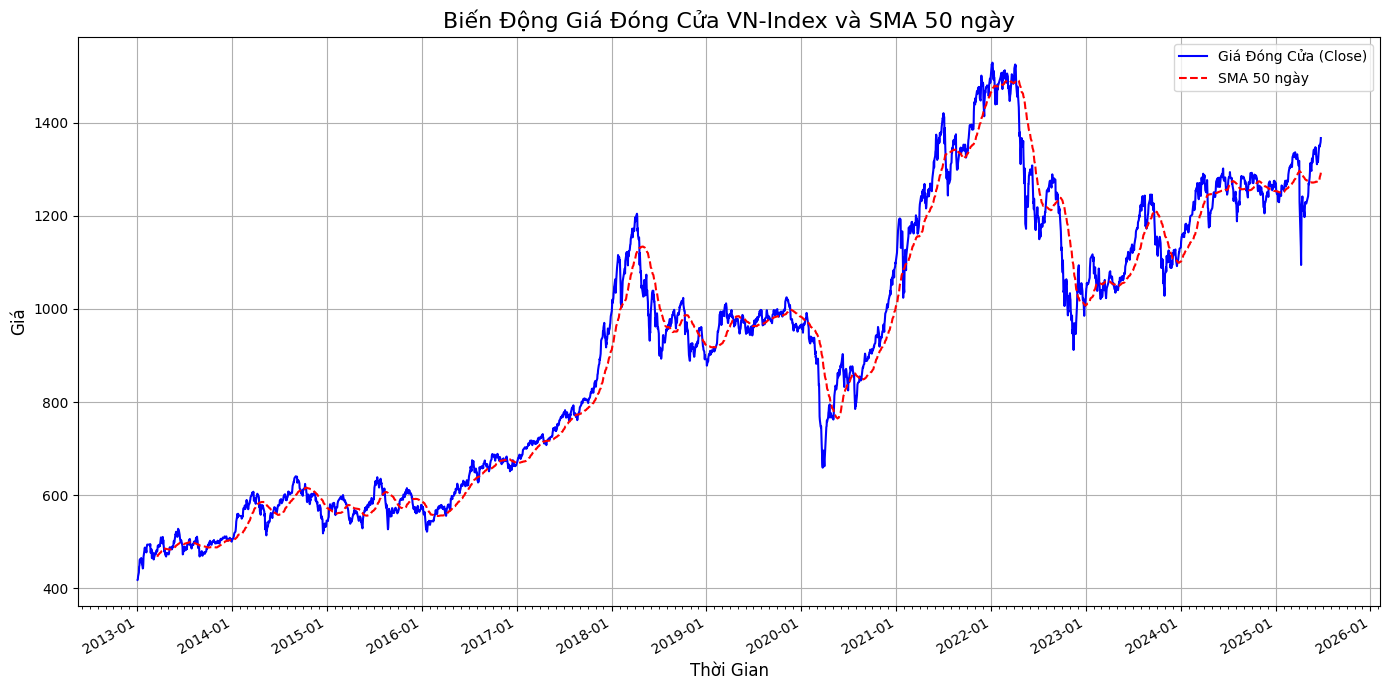

In [5]:
import matplotlib.dates as mdates
# Sort data by time to ensure correct plotting and moving average calculation
df = df.sort_values(by='time')

# Calculate 50-day Simple Moving Average (SMA) of the Close price
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Set 'time' as index for easier plotting (optional but good practice for time series)
df = df.set_index('time')

# Plotting the Close price and SMA_50
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Giá Đóng Cửa (Close)', color='blue')
plt.plot(df['SMA_50'], label='SMA 50 ngày', color='red', linestyle='--')

plt.title('Biến Động Giá Đóng Cửa VN-Index và SMA 50 ngày', fontsize=16)
plt.xlabel('Thời Gian', fontsize=12)
plt.ylabel('Giá', fontsize=12)
plt.legend()
plt.grid(True)

# Format the x-axis to show dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # Auto-format date labels for readability

plt.tight_layout()
plt.savefig('vnindex_close_sma_trend.png')

# Now, analyze the ADX, DI+ and DI- values over time.
# To give a brief textual analysis, I will describe their overall behavior.
# It's better to visualize these too, but for a textual trend analysis,
# I will summarize based on descriptive stats and general knowledge about them.

# First, let's get descriptive stats for ADX, DI+, DI- again to reference.
# (This was already done, but re-running to have it fresh for this specific analysis)
adx_di_stats = df[['ADX', 'DI+', 'DI-']].describe()

print("\nThống kê mô tả cho ADX, DI+, DI-:")
print(adx_di_stats.to_markdown(numalign="left", stralign="left"))

DI+ và DI- có giá trị trung bình khá gần nhau (khoảng 26.26 và 26.08), cho thấy trong tổng thể, thị trường có sự cân bằng giữa các giai đoạn tăng và giảm.

In [6]:
df.corr()

,open,High,Low,Close,volume,ADX,DI+,DI-,RSI,RSI_Overbought,RSI_Oversold,SMA_50
open,1.000000,0.999806,0.999643,0.999391,0.795361,-0.005147,-0.029389,0.075989,0.037204,0.999701,0.998020,0.986361
High,0.999806,1.000000,0.999590,0.999692,0.796112,-0.001156,-0.030461,0.078312,0.036702,0.999886,0.999003,0.987046
Low,0.999643,0.999590,1.000000,0.999704,0.791699,-0.009973,-0.021869,0.066485,0.045335,0.999825,0.999042,0.985089
Close,0.999391,0.999692,0.999704,1.000000,0.793180,-0.004268,-0.025661,0.072021,0.043193,1.000000,1.000000,0.986107
volume,0.795361,0.796112,0.791699,0.793180,1.000000,0.056548,0.001965,-0.011792,0.087163,0.829934,0.684225,0.772915
ADX,-0.005147,-0.001156,-0.009973,-0.004268,0.056548,1.000000,-0.036876,0.166530,-0.078315,0.029698,-0.018622,0.010832
DI+,-0.029389,-0.030461,-0.021869,-0.025661,0.001965,-0.036876,1.000000,-0.731281,0.777312,0.023252,-0.039166,-0.161057
DI-,0.075989,0.078312,0.066485,0.072021,-0.011792,0.166530,-0.731281,1.000000,-0.793044,0.114470,0.064277,0.176688
RSI,0.037204,0.036702,0.045335,0.043193,0.087163,-0.078315,0.777312,-0.793044,1.000000,0.118352,0.151243,-0.063067
RSI_Overbought,0.999701,0.999886,0.999825,1.000000,0.829934,0.029698,0.023252,0.114470,0.118352,1.000000,NaN,0.993513


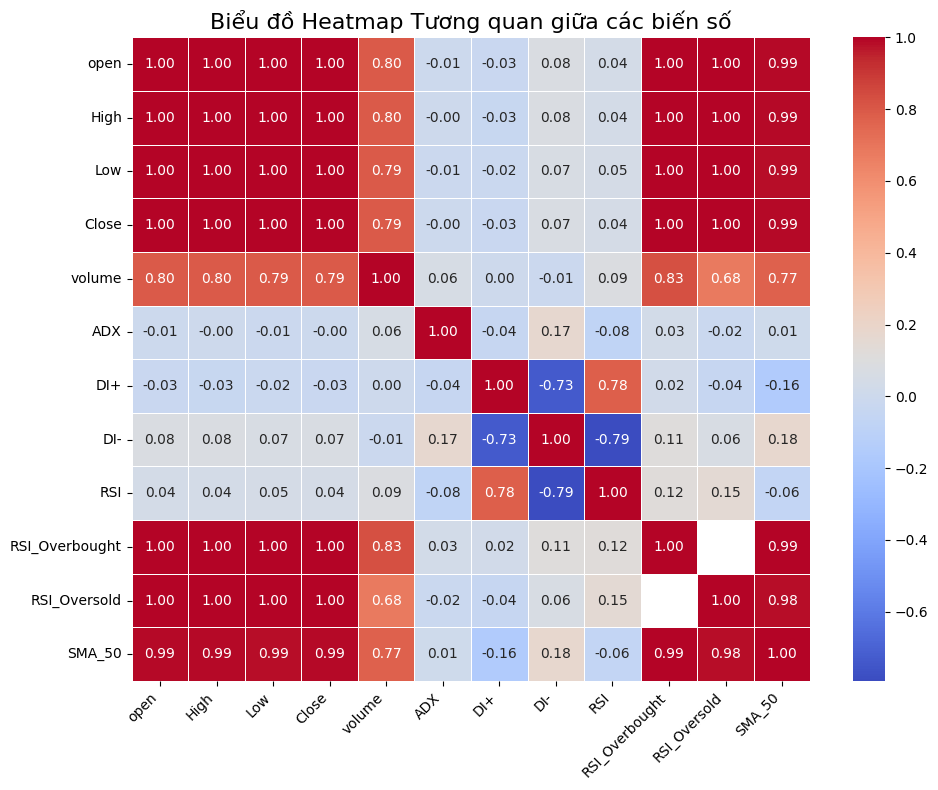

In [7]:
correlation_matrix = df.corr(numeric_only=True)
# Tạo biểu đồ heatmap
plt.figure(figsize=(10, 8)) # Thiết lập kích thước của biểu đồ
sns.heatmap(correlation_matrix,
            annot=True,     # Hiển thị giá trị tương quan trên heatmap
            cmap='coolwarm', # Chọn bảng màu (coolwarm hiển thị tương quan âm/dương rõ ràng)
            fmt=".2f",      # Định dạng số thập phân thành 2 chữ số
            linewidths=.5)  # Thêm đường viền giữa các ô

plt.title('Biểu đồ Heatmap Tương quan giữa các biến số', fontsize=16) # Đặt tiêu đề cho biểu đồ
plt.xticks(rotation=45, ha='right') # Xoay nhãn trục x để dễ đọc
plt.yticks(rotation=0)            # Giữ nguyên nhãn trục y
plt.tight_layout()                # Tự động điều chỉnh bố cục để tránh bị cắt xén


Giá (Open, High, Low, Close) và SMA_50 gần như đồng biến → có thể loại bớt một vài biến nếu cần giảm đa cộng tuyến trong mô hình dự báo.

Volume có mối liên hệ trung bình với giá → đáng để xem xét như biến dự báo hỗ trợ.

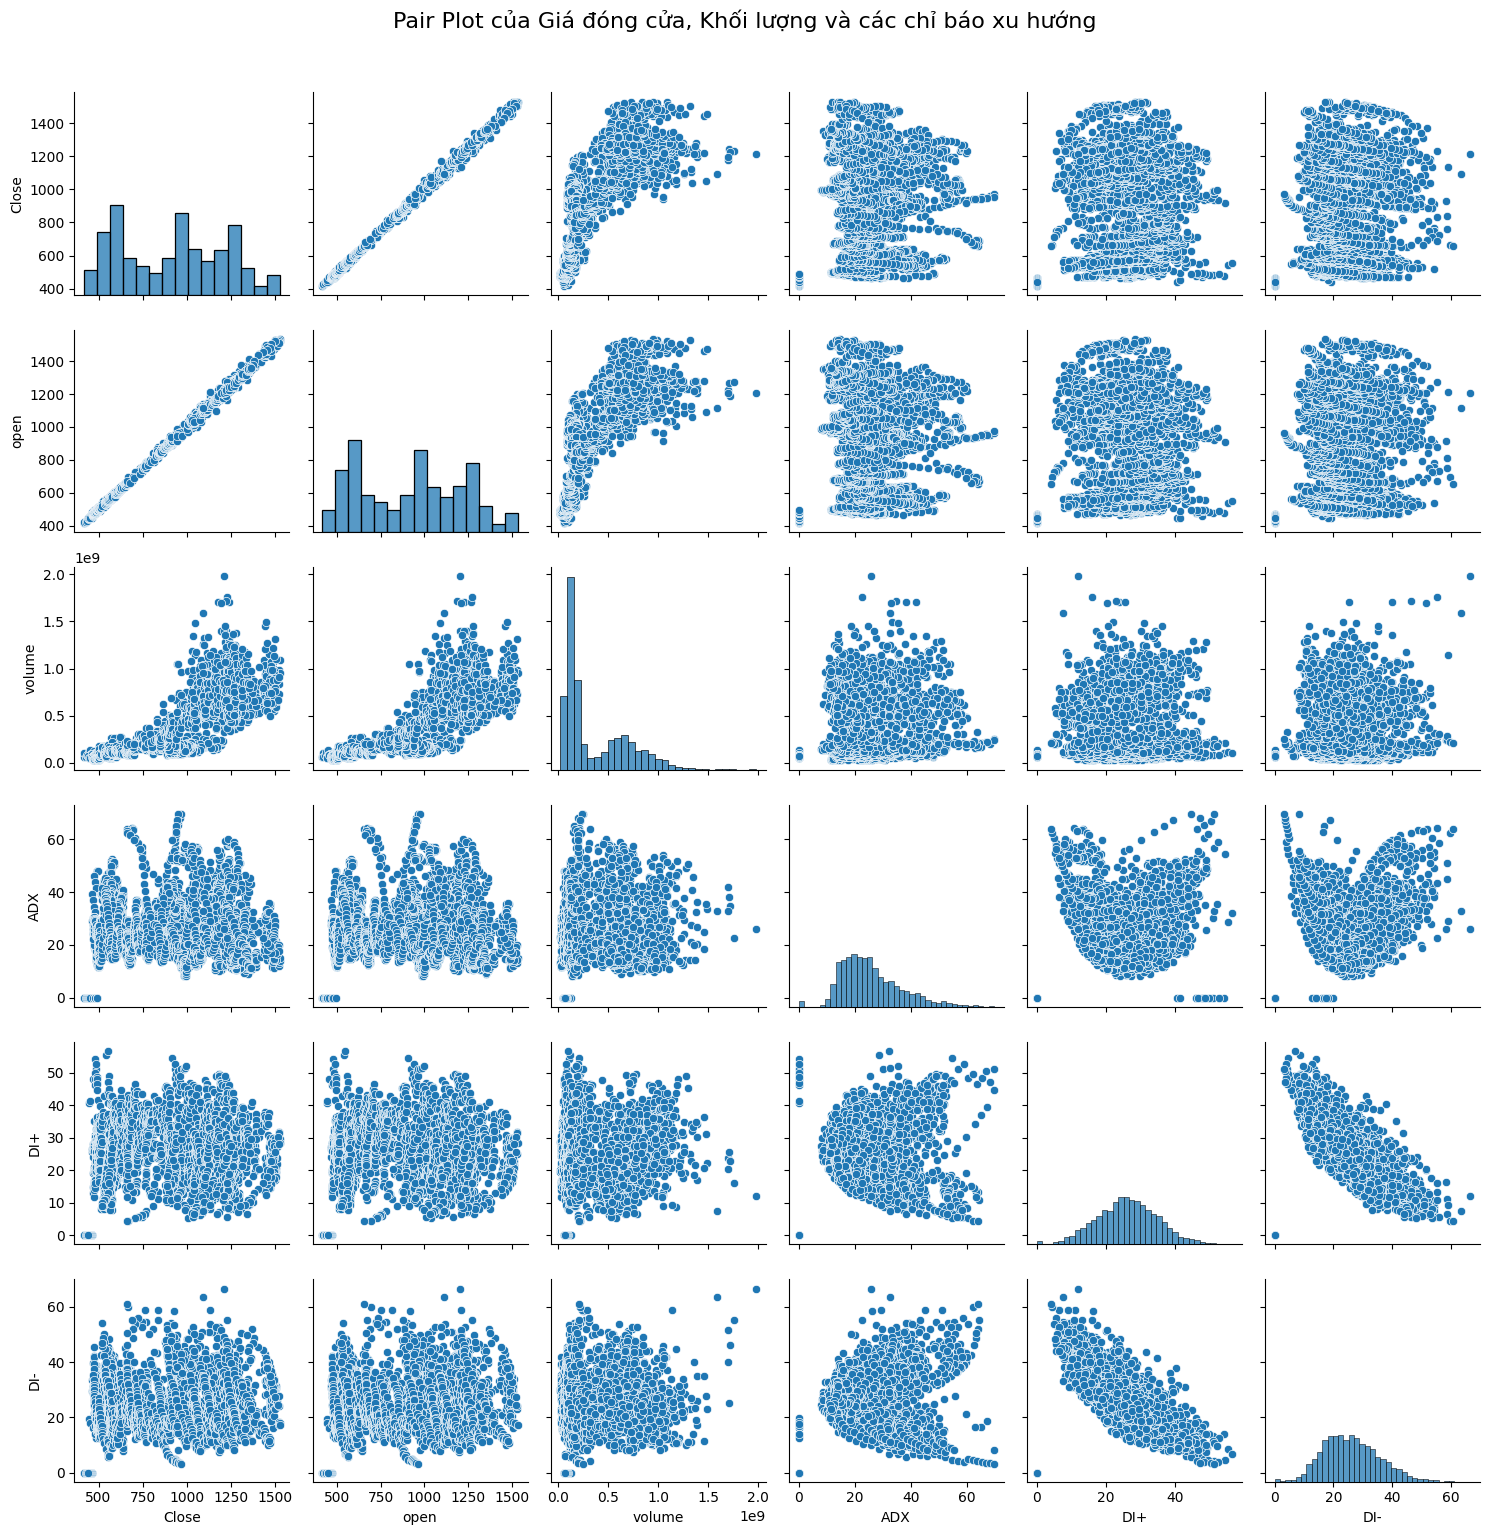

In [8]:
selected_columns = ['Close','open', 'volume', 'ADX', 'DI+', 'DI-']
df_for_pairplot = df[selected_columns]

# Tạo biểu đồ pair plot
# Quá trình này có thể mất một chút thời gian để tạo do có nhiều biểu đồ con
sns.pairplot(df_for_pairplot)
plt.suptitle('Pair Plot của Giá đóng cửa, Khối lượng và các chỉ báo xu hướng', y=1.02, fontsize=16) # Thêm tiêu đề cho biểu đồ chính
plt.tight_layout() # Tự động điều chỉnh bố cục để tránh bị cắt xén

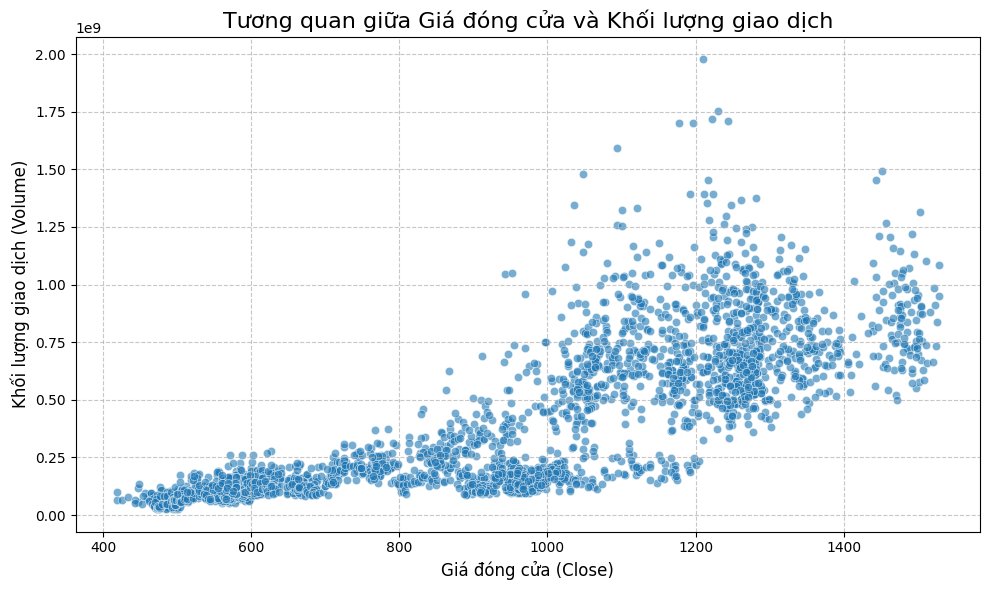

In [9]:
# Create a scatter plot of Close price vs Volume
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Close'], y=df['volume'], alpha=0.6) # Using seaborn for better aesthetics
plt.title('Tương quan giữa Giá đóng cửa và Khối lượng giao dịch', fontsize=16)
plt.xlabel('Giá đóng cửa (Close)', fontsize=12)
plt.ylabel('Khối lượng giao dịch (Volume)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('close_volume_scatterplot.png')

Nhận xét:
+ Mật độ điểm dữ liệu: Hầu hết các điểm dữ liệu tập trung ở vùng giá thấp hơn với khối lượng tương đối thấp, nhưng khi giá tăng lên, các điểm dữ liệu trở nên phân tán hơn và có xu hướng xuất hiện ở mức khối lượng cao hơn.

=> Khối lượng giao dịch có xu hướng tăng lên khi giá tăng, cho thấy sự quan tâm và dòng tiền lớn hơn đổ vào thị trường trong các giai đoạn tăng trưởng.

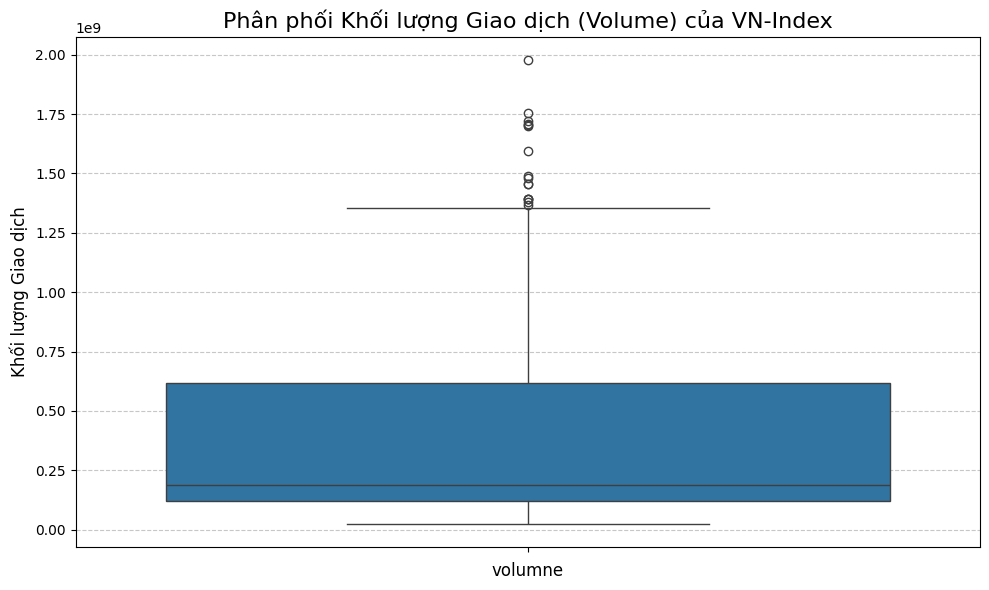

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['volume']) # Using y for vertical box plot
plt.title('Phân phối Khối lượng Giao dịch (Volume) của VN-Index', fontsize=16)
plt.ylabel('Khối lượng Giao dịch', fontsize=12)
plt.xlabel('volumne', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add horizontal grid lines
plt.tight_layout()
plt.savefig('volume_boxplot.png')

Nhận xét:
+ Phân phối không đối xứng (Skewed Distribution): Biểu đồ cho thấy khối lượng giao dịch có sự phân phối lệch về phía dương (right-skewed). Điều này có nghĩa là phần lớn các ngày có khối lượng giao dịch tương đối thấp, nhưng có một số ít ngày (các ngoại lệ) có khối lượng giao dịch cực kỳ cao.

+ Sự biến động lớn của Khối lượng: Khoảng cách từ đáy đến đỉnh của râu cho thấy rằng khối lượng giao dịch có thể biến động rất mạnh giữa các ngày.

+ Sự tồn tại của các phiên giao dịch đột biến: Các điểm ngoại lệ (nằm ngoài râu) đại diện cho những ngày có khối lượng giao dịch "đột biến" cao hơn đáng kể so với thông thường. Đây thường là những ngày có tin tức quan trọng, sự kiện thị trường lớn, hoặc những phiên mà dòng tiền tham gia cực kỳ mạnh mẽ.

MÔ HÌNH DỰ ĐOÁN GIÁ VNINDEX

In [11]:
!pip install xgboost
!pip install lightgbm

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

In [19]:
df['Close_next'] = df['Close'].shift(-1)
df.dropna(subset=['RSI', 'SMA_50', 'Close_next'], inplace=True)

In [20]:
features = ['Close', 'volume', 'ADX', 'DI+', 'DI-', 'RSI', 'SMA_50']
X = df[features]
y = df['Close_next']

In [21]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# LightGBM
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_model.fit(X_train_scaled, y_train)
y_pred_lgb = lgb_model.predict(X_test_scaled)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 2446, number of used features: 7
[LightGBM] [Info] Start training from score 857.257257


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [32]:
#LSTM
# Chuẩn hóa X và y bằng MinMaxScaler
X_all = scaler.fit_transform(X)
y_all = y.values.reshape(-1, 1)
y_scaler = MinMaxScaler()
y_all_scaled = y_scaler.fit_transform(y_all)

# Tạo chuỗi LSTM
timesteps = 10
X_lstm, y_lstm = [], []
for i in range(len(X_all) - timesteps):
    X_lstm.append(X_all[i:i+timesteps])
    y_lstm.append(y_all_scaled[i+timesteps])
X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Chia tập train/test
split = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split], X_lstm[split:]
y_train_lstm, y_test_lstm = y_lstm[:split], y_lstm[split:]

# Mô hình LSTM cải tiến
model = Sequential([
    Input(shape=(timesteps, X.shape[1])),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train_lstm, y_train_lstm, epochs=60, batch_size=16,
          validation_split=0.2, callbacks=[EarlyStopping(patience=5)], verbose=1)

# Dự đoán và đảo ngược chuẩn hóa
y_pred_lstm_scaled = model.predict(X_test_lstm)
y_pred_lstm = y_scaler.inverse_transform(y_pred_lstm_scaled).flatten()
y_test_lstm = y_scaler.inverse_transform(y_test_lstm).flatten()


Epoch 1/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0306 - val_loss: 0.1292
Epoch 2/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0034 - val_loss: 0.0372
Epoch 3/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0023 - val_loss: 0.0155
Epoch 4/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0021 - val_loss: 0.0191
Epoch 5/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0016 - val_loss: 0.0103
Epoch 6/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0084
Epoch 7/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 8/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012 - val_loss: 0.0022
Epoch 9/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0010 - val_loss: 0.0024
Epoch 10/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0010 - val_loss: 0.0032
Epoch 11/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 12/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 

In [33]:
# Evaluation
results = {
    "Random Forest": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "R2": r2_score(y_test, y_pred_rf)
    },
    "XGBoost": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        "R2": r2_score(y_test, y_pred_xgb)
    },
    "LightGBM": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lgb)),
        "R2": r2_score(y_test, y_pred_lgb)
    },
    "LSTM": {
        "RMSE": np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm)),
        "R2": r2_score(y_test_lstm, y_pred_lstm)
    }
}

print("\nModel Comparison:")
for model, metrics in results.items():
    print(f"{model}: RMSE = {metrics['RMSE']:.2f}, R2 = {metrics['R2']:.4f}")


Model Comparison:
Random Forest: RMSE = 15.23, R2 = 0.9706
XGBoost: RMSE = 17.22, R2 = 0.9624
LightGBM: RMSE = 15.20, R2 = 0.9707
LSTM: RMSE = 36.26, R2 = 0.8325


In [37]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, max_error

def adjusted_r2(r2, n, k):
    """R² điều chỉnh: n = số mẫu, k = số đặc trưng"""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

def mean_absolute_percentage_error(y_true, y_pred):  # tránh chia 0
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-10))) * 100

# Tạo dictionary chứa tất cả chỉ số
results = {
    "Random Forest": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        "MAE": mean_absolute_error(y_test, y_pred_rf),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred_rf),
        "MedAE": median_absolute_error(y_test, y_pred_rf),
        "Max Error": max_error(y_test, y_pred_rf),
        "R2": r2_score(y_test, y_pred_rf),
        "Adjusted R2": adjusted_r2(r2_score(y_test, y_pred_rf), len(y_test), X_test.shape[1])
    },
    "XGBoost": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
        "MAE": mean_absolute_error(y_test, y_pred_xgb),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred_xgb),
        "MedAE": median_absolute_error(y_test, y_pred_xgb),
        "Max Error": max_error(y_test, y_pred_xgb),
        "R2": r2_score(y_test, y_pred_xgb),
        "Adjusted R2": adjusted_r2(r2_score(y_test, y_pred_xgb), len(y_test), X_test.shape[1])
    },
    "LightGBM": {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lgb)),
        "MAE": mean_absolute_error(y_test, y_pred_lgb),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred_lgb),
        "MedAE": median_absolute_error(y_test, y_pred_lgb),
        "Max Error": max_error(y_test, y_pred_lgb),
        "R2": r2_score(y_test, y_pred_lgb),
        "Adjusted R2": adjusted_r2(r2_score(y_test, y_pred_lgb), len(y_test), X_test.shape[1])
    },
    "LSTM": {
        "RMSE": np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm)),
        "MAE": mean_absolute_error(y_test_lstm, y_pred_lstm),
        "MAPE": mean_absolute_percentage_error(y_test_lstm, y_pred_lstm),
        "MedAE": median_absolute_error(y_test_lstm, y_pred_lstm),
        "Max Error": max_error(y_test_lstm, y_pred_lstm),
        "R2": r2_score(y_test_lstm, y_pred_lstm),
        "Adjusted R2": adjusted_r2(r2_score(y_test_lstm, y_pred_lstm), len(y_test_lstm), X.shape[1])
    }
}

df_results = pd.DataFrame(results).T
df_results = df_results.round(3)
display(df_results)


,RMSE,MAE,MAPE,MedAE,Max Error,R2,Adjusted R2
Random Forest,15.233,10.886,0.921,8.496,108.724,0.971,0.970
XGBoost,17.220,12.141,1.025,8.676,106.083,0.962,0.962
LightGBM,15.199,10.910,0.921,8.558,95.348,0.971,0.970
LSTM,36.259,28.838,2.433,24.931,176.519,0.833,0.831


LightGBM

*   Có RMSE thấp nhất (15.199) → sai số bình phương trung bình nhỏ nhất.
*   MAPE và MAE tương đương với Random Forest.
*   Max Error thấp nhất -> ít bị ảnh hưởng bởi outlier.